Lets start with reading the data


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns   


data = pd.read_csv("marketing_campaign.csv", encoding='latin1', sep="\t")

data.head()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\3627614026.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


We check the data types to see if any encoding required.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can clearly see that Dt_Customer and ID does nothing 

In [3]:
data.drop(columns= ['ID','Dt_Customer'], inplace=True)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


Lets check the null values

In [4]:
for col in data.columns:
    null_values_column = data[col].isnull().sum()
    print("Null values in column",col ,null_values_column)

Null values in column Year_Birth 0
Null values in column Education 0
Null values in column Marital_Status 0
Null values in column Income 24
Null values in column Kidhome 0
Null values in column Teenhome 0
Null values in column Recency 0
Null values in column MntWines 0
Null values in column MntFruits 0
Null values in column MntMeatProducts 0
Null values in column MntFishProducts 0
Null values in column MntSweetProducts 0
Null values in column MntGoldProds 0
Null values in column NumDealsPurchases 0
Null values in column NumWebPurchases 0
Null values in column NumCatalogPurchases 0
Null values in column NumStorePurchases 0
Null values in column NumWebVisitsMonth 0
Null values in column AcceptedCmp3 0
Null values in column AcceptedCmp4 0
Null values in column AcceptedCmp5 0
Null values in column AcceptedCmp1 0
Null values in column AcceptedCmp2 0
Null values in column Complain 0
Null values in column Z_CostContact 0
Null values in column Z_Revenue 0
Null values in column Response 0


We can clearly see that Income column has null value and we should handle the null values based on distribution of data. So lets check the histogram of Education and Income.

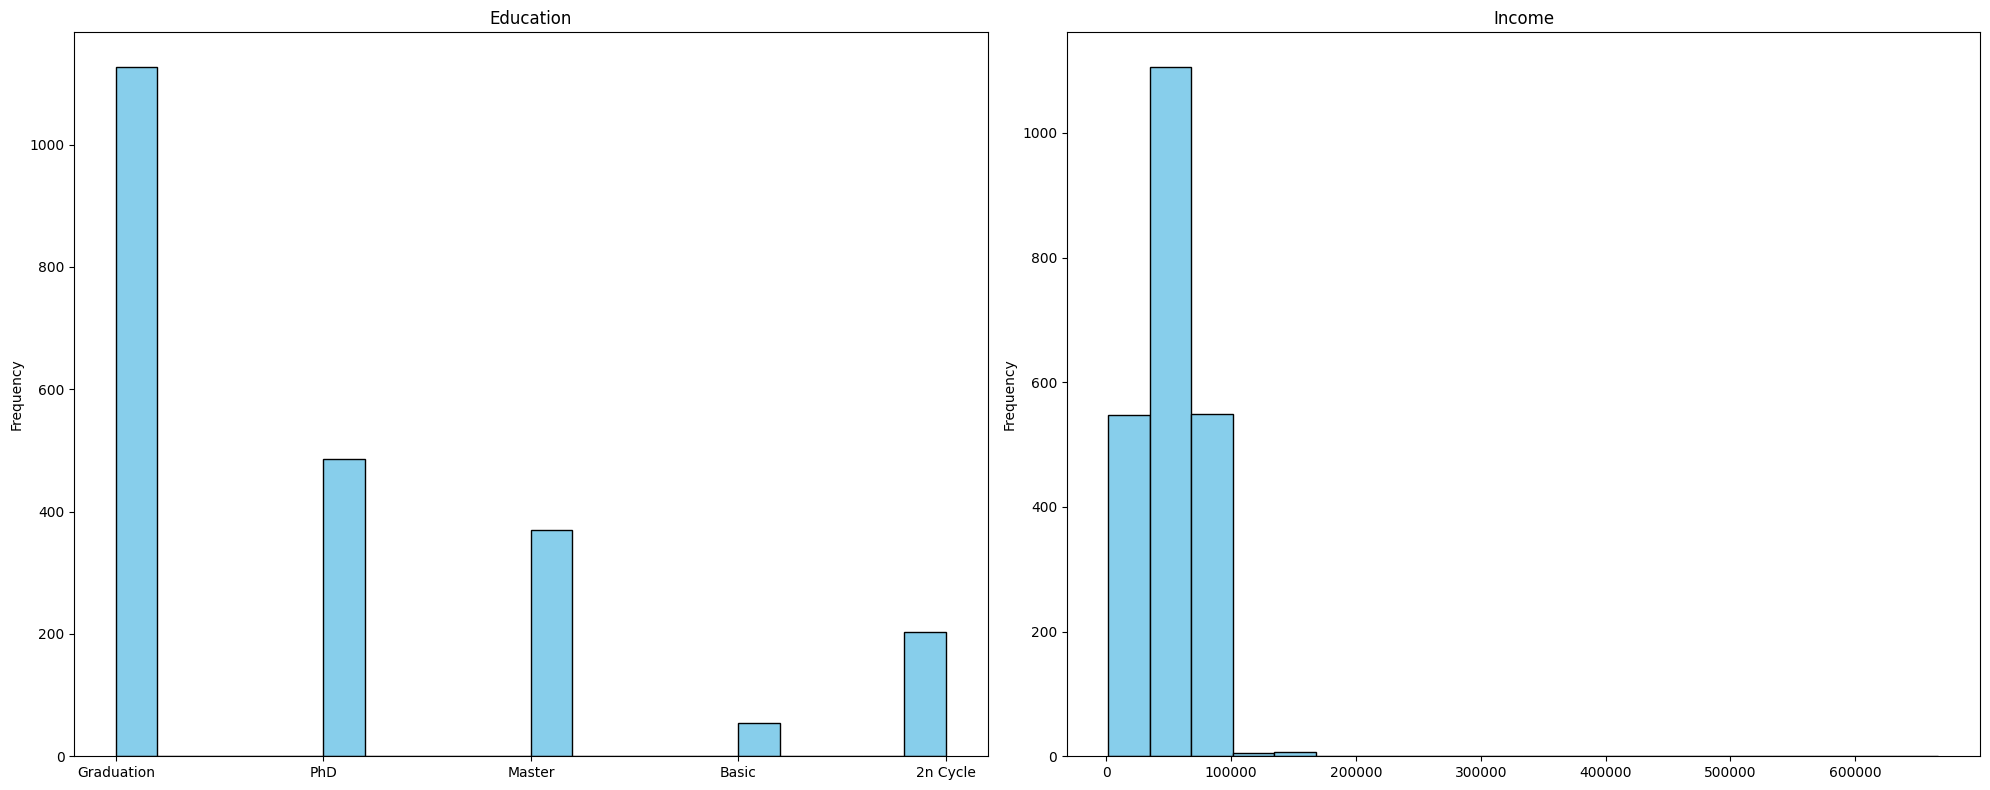

In [5]:
columns = ["Education", "Income"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

Lets handle the missing values.

In [6]:
data['Income'] = data.groupby('Education')['Income'].transform(lambda x: x.fillna(x.mean()))

Lets check if any problem unique values exist and handle them.


In [7]:
for col in data.columns:
    unique_values_count = data[col].nunique()   
    print("Unique values in column",col ,unique_values_count) #If any caterogical column would be high we would need to remove them too.

    if(unique_values_count == 1):
        print("Handled for: " + col)
        data = data.drop(columns = col) 
    

Unique values in column Year_Birth 59
Unique values in column Education 5
Unique values in column Marital_Status 8
Unique values in column Income 1978
Unique values in column Kidhome 3
Unique values in column Teenhome 3
Unique values in column Recency 100
Unique values in column MntWines 776
Unique values in column MntFruits 158
Unique values in column MntMeatProducts 558
Unique values in column MntFishProducts 182
Unique values in column MntSweetProducts 177
Unique values in column MntGoldProds 213
Unique values in column NumDealsPurchases 15
Unique values in column NumWebPurchases 15
Unique values in column NumCatalogPurchases 14
Unique values in column NumStorePurchases 14
Unique values in column NumWebVisitsMonth 16
Unique values in column AcceptedCmp3 2
Unique values in column AcceptedCmp4 2
Unique values in column AcceptedCmp5 2
Unique values in column AcceptedCmp1 2
Unique values in column AcceptedCmp2 2
Unique values in column Complain 2
Unique values in column Z_CostContact 1


Handle duplicated values.

In [8]:
a = data.duplicated().sum()
if(a > 0):
    data.drop_duplicates(inplace=True)

Now lets handle outliers for numeric datas.

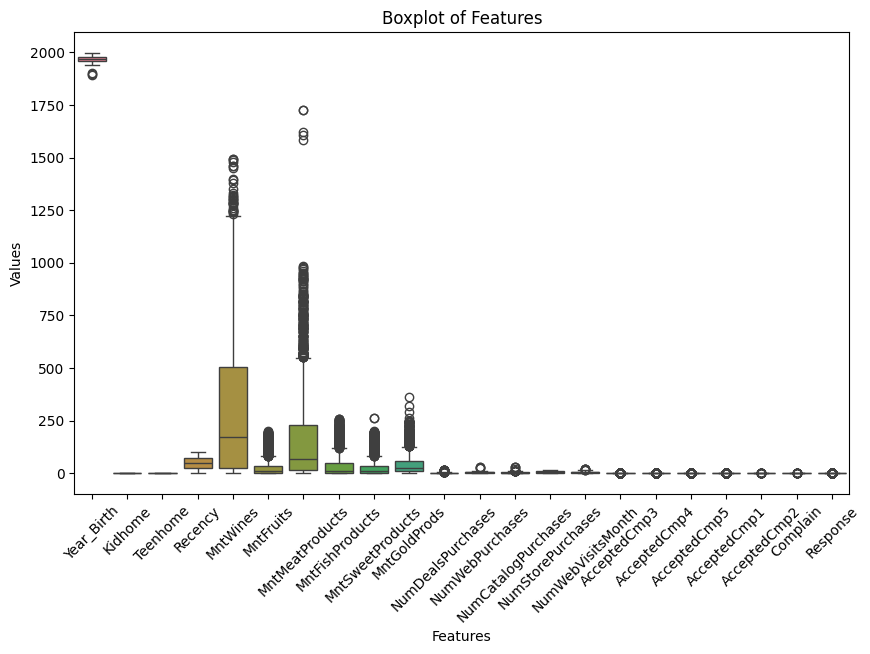

In [9]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_columns.remove('Income')


plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

Box Plot didn't help us much to visualize outliers but we'll still use the iqr technique for handling outliers.

In [10]:
outliers = []
data_without_outliers = data.copy()
for col in numerical_columns:
    if col.startswith('Accepted') or col.startswith('Complain') or col.startswith('Response'):
        print('No outliers in column: ', col)
        continue
    else:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upperbound = Q3 + IQR * 3
        lowerbound = Q1 - IQR * 3

        outliers_filter = (data[col] < lowerbound) | (data[col] > upperbound)
        col_outliers = data[outliers_filter][col]
        outliers.extend(col_outliers.tolist())

        data_without_outliers = data_without_outliers[~outliers_filter]

print("Outliers:", len(outliers))

No outliers in column:  AcceptedCmp3
No outliers in column:  AcceptedCmp4
No outliers in column:  AcceptedCmp5
No outliers in column:  AcceptedCmp1
No outliers in column:  AcceptedCmp2
No outliers in column:  Complain
No outliers in column:  Response
Outliers: 367


C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\826713448.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_without_outliers = data_without_outliers[~outliers_filter]
C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\826713448.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_without_outliers = data_without_outliers[~outliers_filter]
C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\826713448.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_without_outliers = data_without_outliers[~outliers_filter]
C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\826713448.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_without_outliers = data_without_outliers[~outliers_filter]
C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\826713448.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_without_outlie

Lets check the caterogical values

In [11]:
print(data['Marital_Status'].value_counts())
print(data['Education'].value_counts())

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data.drop(columns='Marital_Status', inplace= True)



Marital_Status
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Education
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: count, dtype: int64


Adding some features for later clustering.

In [12]:
data["Children"]=data["Kidhome"]+data["Teenhome"]
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\3973771779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


Now lets do encoding for object data types


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
education = data['Education']
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Living_With'] = label_encoder.fit_transform(data['Living_With'])

data.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Children,Family_Size
0,1957,2,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,1
1,1954,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,0,2,3
2,1965,2,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,2
3,1984,2,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,1,3
4,1981,4,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,1,1,3


Lets arrange data more precisely.

In [14]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Age"] = 2024-data["Year_Birth"]


Using KMeans for clustering.
We need to find the optimal K for the data we have therefore we need to have reduction in variance graph that's why I store different Ks.

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
 
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [16]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 17955.826912546996
2 : 9866.536274372009
3 : 9528.027837647925
4 : 6812.339694046801
5 : 6506.965894763282
6 : 5050.354045884428
7 : 4072.1398893921596
8 : 3606.949493597702
9 : 3144.958020118081


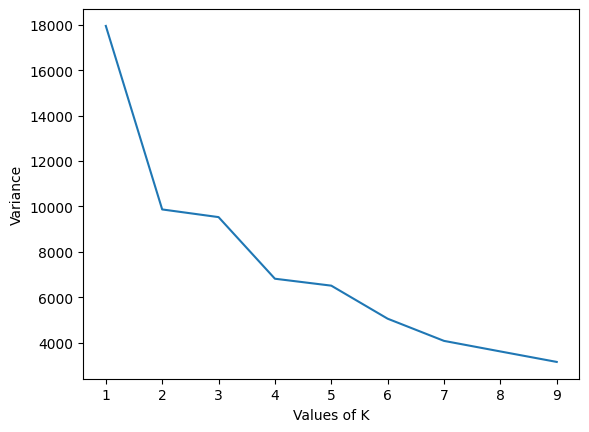

In [17]:
plt.plot(K, distortions)
plt.xlabel('Values of K')
plt.ylabel('Variance')
plt.show()

Based on the above graph we could either pick 3 or 4 which I will use 4.

In [18]:
K_C = KMeans(n_clusters=4) 
yhat_KC = K_C.fit_predict(data)
data["Clusters"]= yhat_KC

Now lets see the distribution of clusters.

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_12180\1999309165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


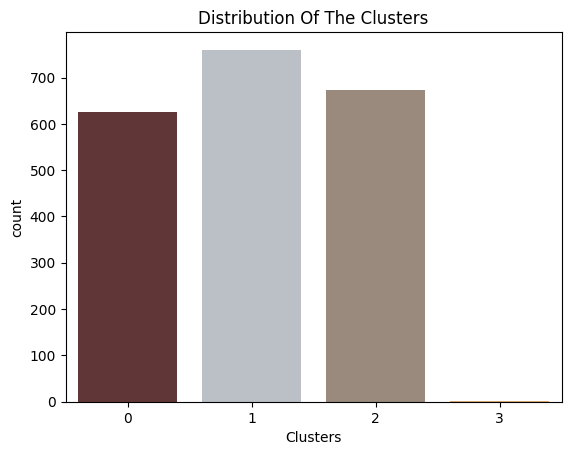

In [19]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Now we need to correlate these clusters with some real life information such as Family Size, Age, Education, Spent etc.

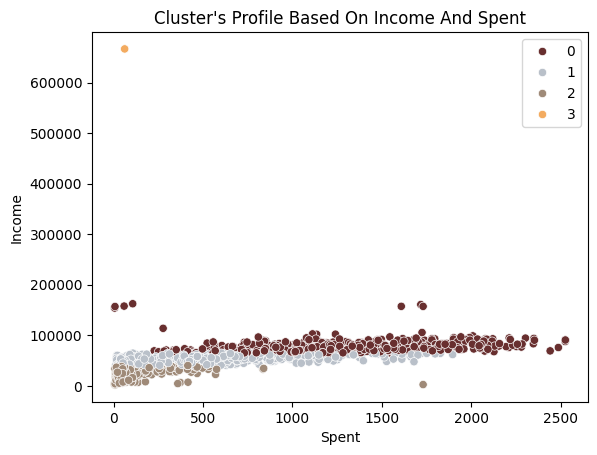

In [20]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spent")
plt.legend()
plt.show()

In the above we can clearly see that the main customers are in the cluster 0 and cluster 1 and little bit cluster 3 so we'll focus on these clusters.

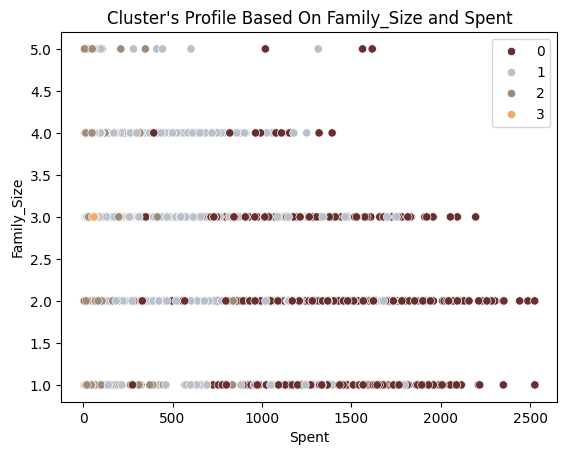

In [21]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Family_Size"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Family_Size and Spent")
plt.legend()
plt.show()

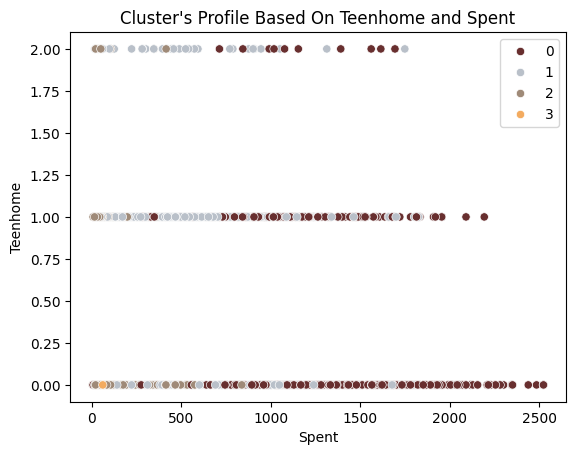

In [22]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Teenhome"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Teenhome and Spent")
plt.legend()
plt.show()

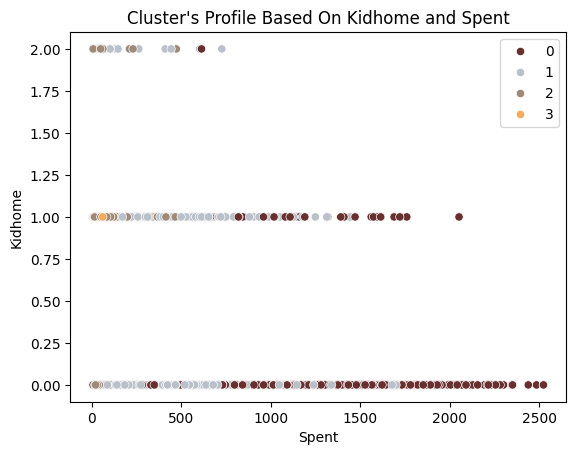

In [23]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Kidhome"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Kidhome and Spent")
plt.legend()
plt.show()

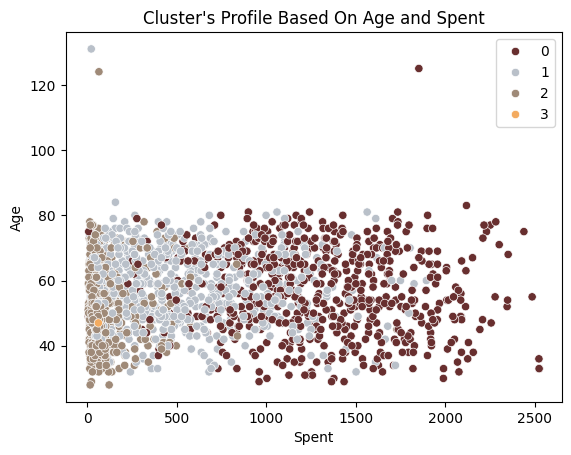

In [24]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Age"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Age and Spent")
plt.legend()
plt.show()

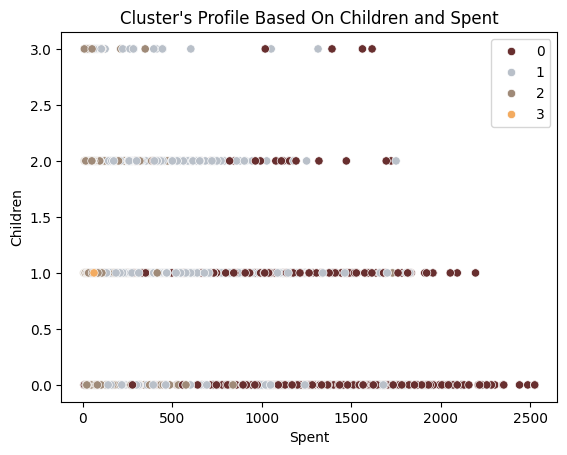

In [25]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Children"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Children and Spent")
plt.legend()
plt.show()

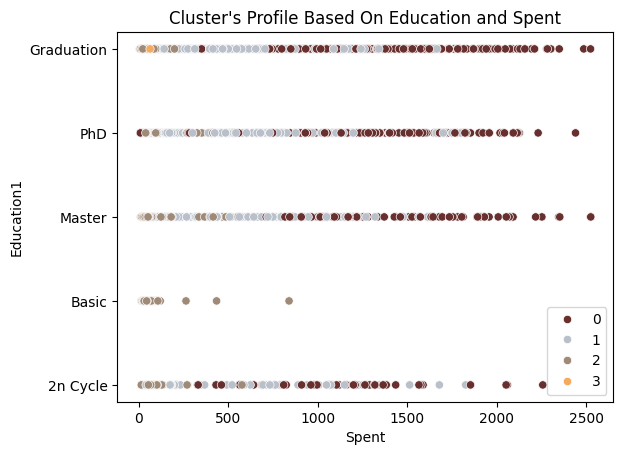

In [26]:
data['Education1'] = education
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Education1"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Education and Spent")
plt.legend()
plt.show()

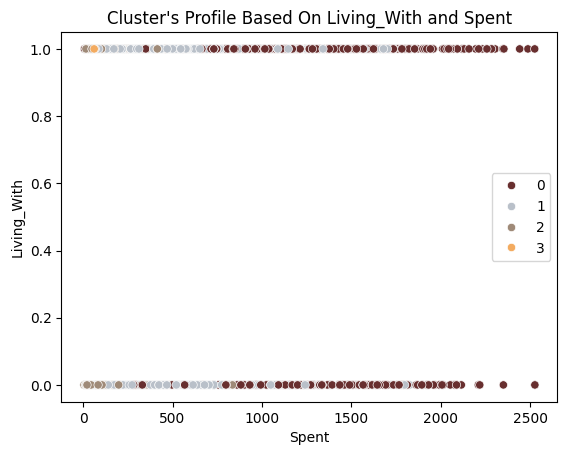

In [27]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Living_With"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Living_With and Spent")
plt.legend()
plt.show()

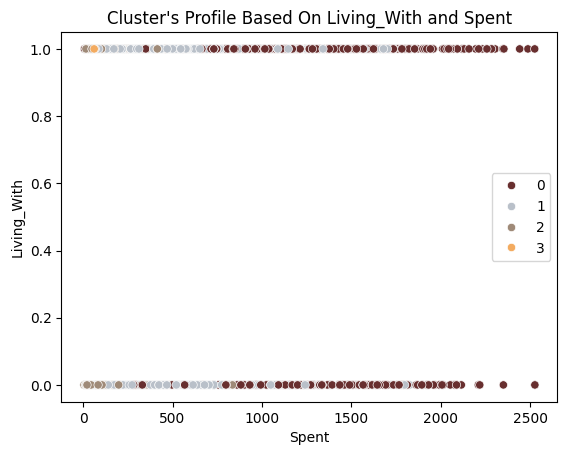

In [28]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Living_With"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Living_With and Spent")
plt.legend()
plt.show()

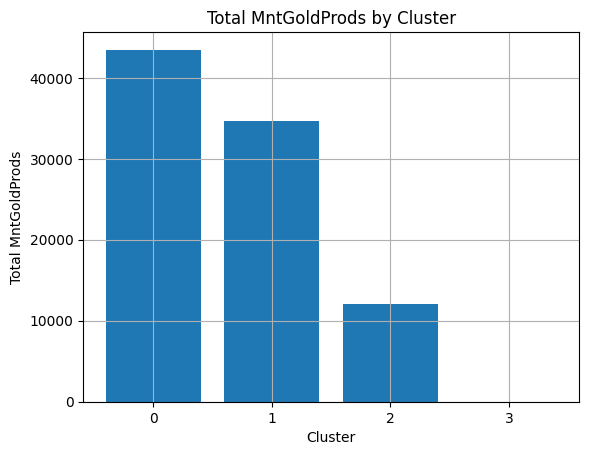

In [35]:
cluster_gold_prods = data.groupby('Clusters')['MntGoldProds'].sum()

plt.bar(cluster_gold_prods.index, cluster_gold_prods.values)
plt.xlabel('Cluster')
plt.ylabel('Total MntGoldProds')
plt.title('Total MntGoldProds by Cluster')
plt.xticks(cluster_gold_prods.index) 
plt.grid(True)
plt.show()

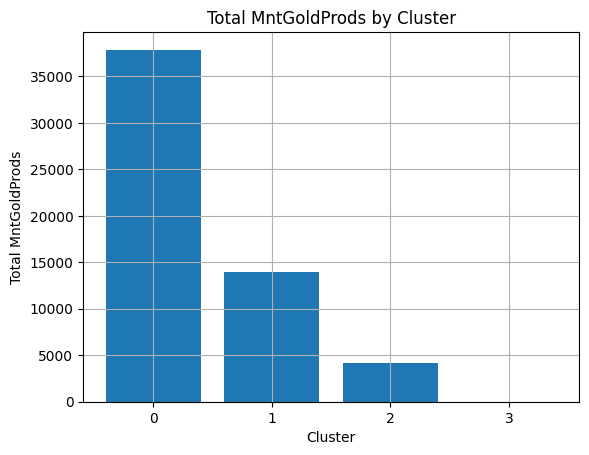

In [36]:
cluster_gold_prods = data.groupby('Clusters')['MntSweetProducts'].sum()

plt.bar(cluster_gold_prods.index, cluster_gold_prods.values)
plt.xlabel('Cluster')
plt.ylabel('Total MntSweetProducts')
plt.title('Total MntSweetProducts by Cluster')
plt.xticks(cluster_gold_prods.index) 
plt.grid(True)
plt.show()

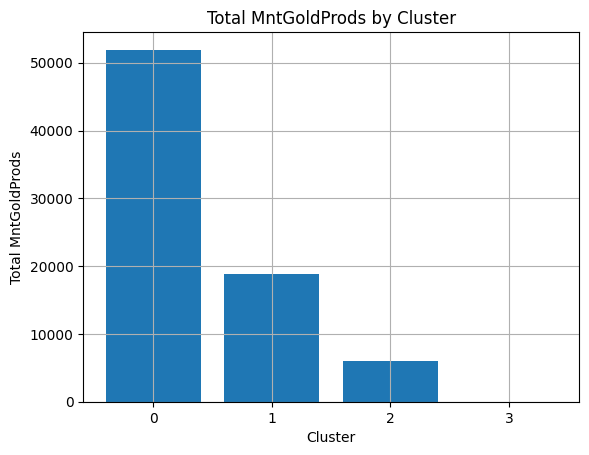

In [37]:
cluster_gold_prods = data.groupby('Clusters')['MntFishProducts'].sum()

plt.bar(cluster_gold_prods.index, cluster_gold_prods.values)
plt.xlabel('Cluster')
plt.ylabel('Total MntFishProducts')
plt.title('Total MntFishProducts by Cluster')
plt.xticks(cluster_gold_prods.index) 
plt.grid(True)
plt.show()

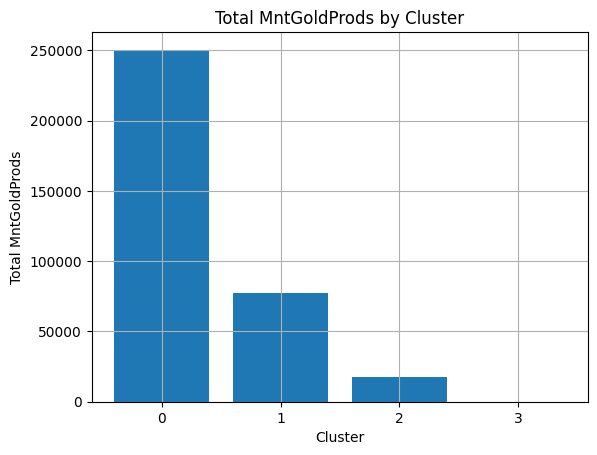

In [38]:
cluster_gold_prods = data.groupby('Clusters')['MntMeatProducts'].sum()

plt.bar(cluster_gold_prods.index, cluster_gold_prods.values)
plt.xlabel('Cluster')
plt.ylabel('Total MntMeatProducts')
plt.title('Total MntMeatProducts by Cluster')
plt.xticks(cluster_gold_prods.index) 
plt.grid(True)
plt.show()

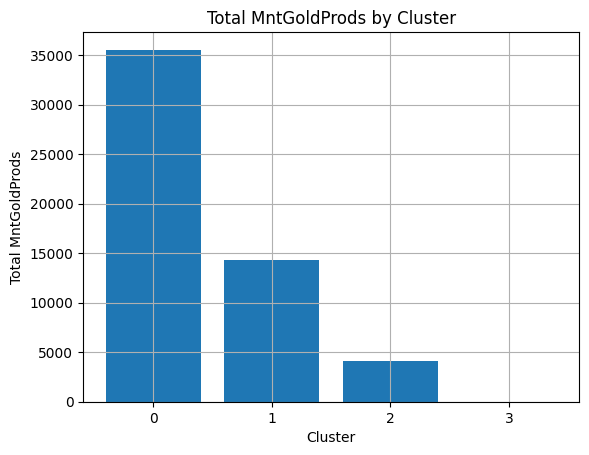

In [39]:
cluster_gold_prods = data.groupby('Clusters')['MntFruits'].sum()

plt.bar(cluster_gold_prods.index, cluster_gold_prods.values)
plt.xlabel('Cluster')
plt.ylabel('Total MntFruits')
plt.title('Total MntFruits by Cluster')
plt.xticks(cluster_gold_prods.index) 
plt.grid(True)
plt.show()

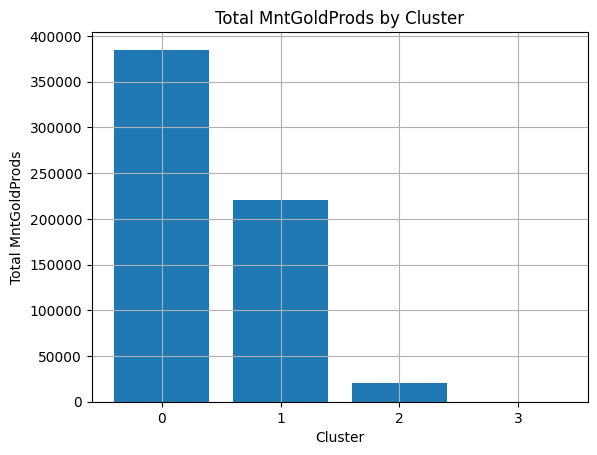

In [40]:
cluster_gold_prods = data.groupby('Clusters')['MntWines'].sum()

plt.bar(cluster_gold_prods.index, cluster_gold_prods.values)
plt.xlabel('Cluster')
plt.ylabel('Total MntWines')
plt.title('Total MntWines by Cluster')
plt.xticks(cluster_gold_prods.index) 
plt.grid(True)
plt.show()